In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 43s 0us/step


In [0]:
print(train_images.shape)
print(len(train_images))
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)
print(train_labels)

(50000, 32, 32, 3)
50000
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


**20% of training data for simple hold-out validation**

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(y_train)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)
[[6]
 [2]
 [5]
 ...
 [8]
 [8]
 [8]]


**One-hot encoded labels**

In [0]:
from keras.utils import to_categorical

y_train_cate = to_categorical(y_train)
y_val_cate = to_categorical(y_val)
train_labels_cate = to_categorical(train_labels)
test_labels_cate = to_categorical(test_labels)

In [0]:
print(y_train_cate.shape)
print(y_val_cate.shape)
print(train_labels_cate.shape)
print(test_labels_cate.shape)
print(y_train[0])
print(y_train_cate[0])

(40000, 10)
(10000, 10)
(50000, 10)
(10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# 6 conv layer CNN model with batch normalization and dropout

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

model = Sequential()
# conv layers
# 1
model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3)))
model.add(BatchNormalization()) # before non-linearity
model.add(Activation("relu"))
# 2
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
# 3
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
# 4
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
# 5
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
# 6
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))

# dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
# dropout
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(
    loss='categorical_crossentropy',  
    optimizer = 'adam',
    metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_2 (Activat

# Simple hold-out validation (around 0.84 validation accuracy, best model)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 256

# data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    brightness_range=(0.8, 1.2),
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(
    X_train,
    y_train_cate,
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow(
    X_val,
    y_val_cate,
    batch_size=batch_size
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=X_train.shape[0] / batch_size,
    epochs=75,
    validation_data=validation_generator,
    validation_steps=X_val.shape[0] / batch_size
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/75
157/156 [==============================] - 80s 512ms/step - loss: 2.2485 - acc: 0.2133 - val_loss: 2.3180 - val_acc: 0.1856
Epoch 2/75
157/156 [==============================] - 72s 455ms/step - loss: 1.8781 - acc: 0.2952 - val_loss: 1.9190 - val_acc: 0.2929
Epoch 3/75
157/156 [==============================] - 73s 463ms/step - loss: 1.7627 - acc: 0.3393 - val_loss: 2.0543 - val_acc: 0.3167
Epoch 4/75
157/156 [==============================] - 71s 455ms/step - loss: 1.6573 - acc: 0.3880 - val_loss: 1.9857 - val_acc: 0.3434
Epoch 5/75
157/156 [==============================] - 70s 448ms/step - loss: 1.5684 - acc: 0.4260 - val_loss: 1.9364 - val_acc: 0.3569
Epoch 6/75
157/156 [==============================] - 73s 465ms/step - loss: 1.4997 - acc: 0.4547 - val_loss: 1.4912 - val_acc: 0.4747
Epoch 7/75
157/156 [==============================] - 73s 467ms/step - loss: 1.4407 - acc: 0.4774 - val_loss: 1.6450 - val_acc: 0.4420
Epoch 8

# Curves of loss and accuracy

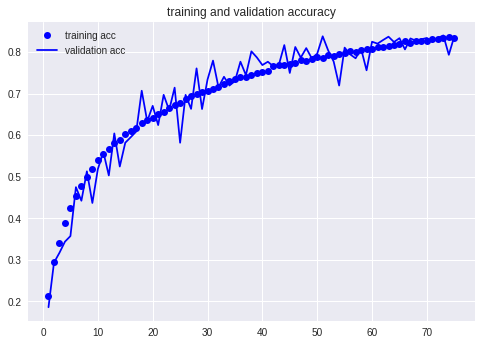

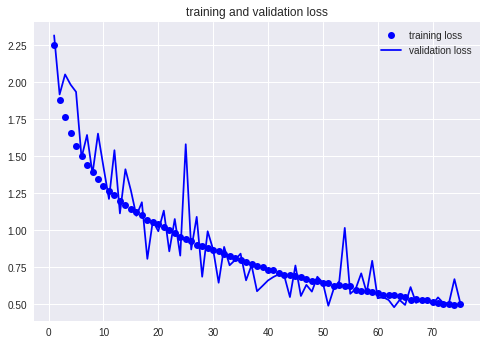

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

# Train this best model on the entire training data (50000, model recompiled)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 256

# data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    brightness_range=(0.8, 1.2),
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(
    train_images,
    train_labels_cate,
    batch_size=batch_size,
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_images.shape[0] / batch_size,
    epochs=200
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
196/195 [==============================] - 58s 293ms/step - loss: 2.3576 - acc: 0.1997
Epoch 2/200
196/195 [==============================] - 54s 273ms/step - loss: 1.8816 - acc: 0.2900
Epoch 3/200
196/195 [==============================] - 53s 272ms/step - loss: 1.7570 - acc: 0.3427
Epoch 4/200
196/195 [==============================] - 53s 268ms/step - loss: 1.6569 - acc: 0.3896
Epoch 5/200
196/195 [==============================] - 53s 269ms/step - loss: 1.5744 - acc: 0.4227
Epoch 6/200
196/195 [==============================] - 53s 269ms/step - loss: 1.5104 - acc: 0.4474
Epoch 7/200
196/195 [==============================] - 53s 269ms/step - loss: 1.4532 - acc: 0.4708
Epoch 8/200
196/195 [==============================] - 54s 273ms/step - loss: 1.4089 - acc: 0.4911
Epoch 9/200
196/195 [==============================] - 53s 270ms/step - loss: 1.3504 - acc: 0.5169
Epoch 10/200
196/195 [==============================] - 53s 2

# Display training curves of loss and accuracy

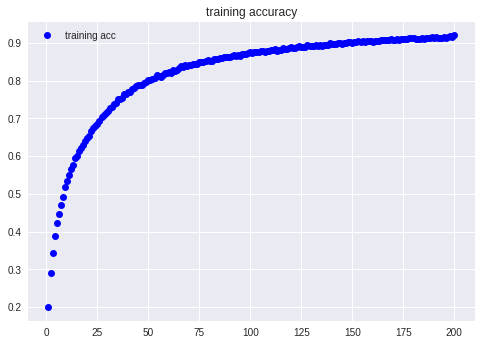

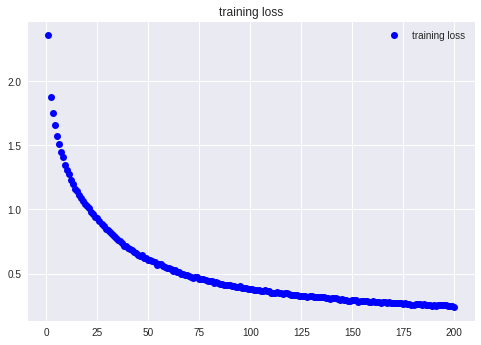

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']

loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# training accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.title('training accuracy')
plt.legend()

plt.figure()

# training loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.title('training loss')
plt.legend()

plt.show()

# Evaluate on test data

In [0]:
X_test = test_images * 1./255

print(X_test.shape)

(10000, 32, 32, 3)


**0.8743 test accuracy**

In [0]:
score = model.evaluate(X_test, test_labels_cate, verbose=0)
print(score)

[0.469849583363533, 0.8743]


# Save model

In [0]:
model.save('cifar10_classifier.h5')

In [0]:
!ls

cifar10_classifier.h5  sample_data


In [0]:
from google.colab import files

with open('cifar10_classifier.h5', 'r') as f:
  files.download('cifar10_classifier.h5')